# <center>Graphical Analysis of the FIFA All-Time Table (1930-2018)</center>
<h3><center>_Analysis of the FIFA World Cup stats from 1930 to 2018_</center></h3>

---

# Introduction

This analysis was created using the FIFA All-Time ranking (https://www.fifa.com/fifa-tournaments/statistics-and-records/worldcup/teams/index.html ). The data considers the major stats of all teams that have played the FIFA World Cup since its inaugural tournament in 1930 until the 2018 Cup. The main criteria for comparisons are participations, matches played, games won, drawn and lost, goals for and against, and the total accumulated points. The total points refers to the theoretical sum of points of every match played during the World Cup in the period. This method takes each game as if it were a group-stage match. So three points are awarded for each victory, one point for each draw and none for the losses. Matches decided in penalty shootouts are count as draws.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

stats = pd.read_csv('WC-Table-1930-2018.csv')

In [2]:
stats.head()

,Pos,Team,Parts,Pld,W,D,L,GF,GA,GD,Pts,AvgPts,BestFinish,Confederation
0,1,Brazil,21,109,73,18,18,229,105,124,237,2.17,Winner (5 times),CONMEBOL
1,2,Germany,19,109,67,20,22,226,125,101,221,2.03,Winner (4 times),UEFA
2,3,Italy,18,83,45,21,17,128,77,51,156,1.88,Winner (4 times),UEFA
3,4,Argentina,17,81,43,15,23,137,93,44,144,1.78,Winner (2 times),CONMEBOL
4,5,France,15,66,34,13,19,120,77,43,115,1.74,Winner (2 times),UEFA


In [3]:
stats.columns

Index(['Pos', 'Team', 'Parts', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts',
       'AvgPts', 'BestFinish', 'Confederation'],
      dtype='object')

In [4]:
#stats.info()

In [5]:
stats.BestFinish = stats.BestFinish.astype('category')
stats.Confederation = stats.Confederation.astype('category')

In [6]:
stats.BestFinish.cat.categories

Index(['First round', 'Fourth place', 'Quarter-finals', 'Runners-up',
       'Second round', 'Third place', 'Winner (1 time)', 'Winner (2 times)',
       'Winner (4 times)', 'Winner (5 times)'],
      dtype='object')

In [7]:
stats.Confederation.cat.categories

Index(['AFC', 'CAF', 'CONCACAF', 'CONMEBOL', 'OFC', 'UEFA'], dtype='object')

***

In [8]:
stats[stats['Team']=='Trinidad and Tobago'].index.values.astype(int)[0]

67

In [9]:
stats.at[58, 'Team'] = 'Bosnia Herzeg.'
stats.at[stats[stats['Team']=='Trinidad and Tobago'].index.values.astype(int)[0], 'Team'] = 'Trinidad Tobago'
stats.at[stats[stats['Team']=='United Arab Emirates'].index.values.astype(int)[0], 'Team'] = 'U. Arab Emirates'
stats.at[stats[stats['Team']=='Republic of Ireland'].index.values.astype(int)[0], 'Team'] = 'Rep. of Ireland'

## 1. Number of Appearances in the FIFA World Cup

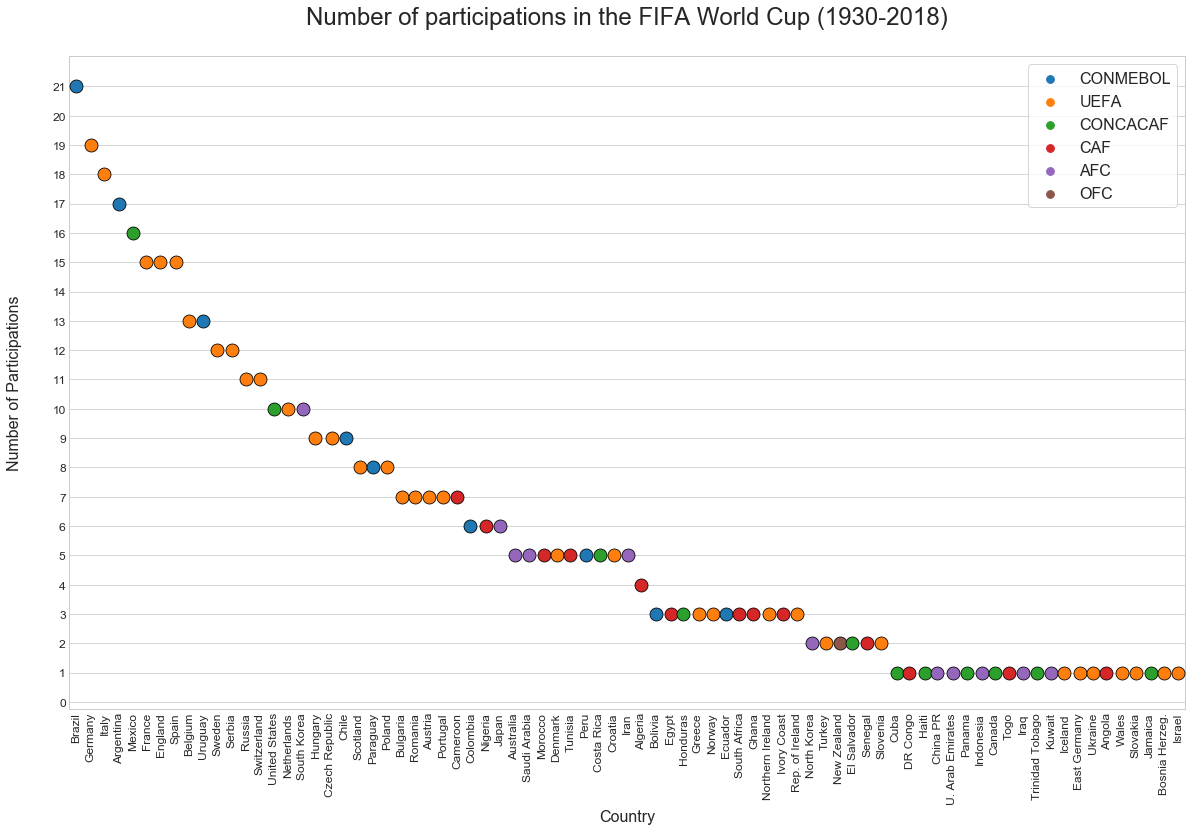

In [10]:
sns.set_style('whitegrid')
f1, ax = plt.subplots(figsize=(20, 12))
sns.stripplot(data=stats,x=stats.sort_values('Parts',ascending=False).Team, y=stats.Parts, 
              hue=stats.Confederation,jitter=True,edgecolor='black', linewidth=0.8, marker='o', size=13, 
              hue_order = ['CONMEBOL', 'UEFA', 'CONCACAF', 'CAF', 'AFC','OFC'])
plt.xticks(rotation=90,fontsize=12)
plt.yticks(np.arange(0,(stats.Parts.max()+1),1),fontsize=12)
plt.title('Number of participations in the FIFA World Cup (1930-2018)',size=24, y=1.04)
plt.xlabel('Country',size=16, labelpad=5)
plt.ylabel('Number of Participations',size=16, labelpad=30)
plt.legend(prop={'size':16}, frameon=True, facecolor='white')

f1.savefig('01NumberPartcipations.png', dpi=300)
plt.show()

Brazil is the only country that has played all FIFA World Cup editions. More than a quarter of the countries (26.58%) have only participated in a single edition, and nearly half of them (49.37%) have never played more than four FIFA World Cups.

CONMEBOL is the confederation with the fewest country rotation in the qualifiers. Bolivia and Ecuador, their representatives with the fewest number of appearances, have three participations each throughout the tournament. Other confederations (not considering OFC) all have at least three teams with a single participation in the tournament.

[39. 23.  9.  7.  1.]
[0.49367089 0.29113924 0.11392405 0.08860759 0.01265823]
21
0.26582278481012656


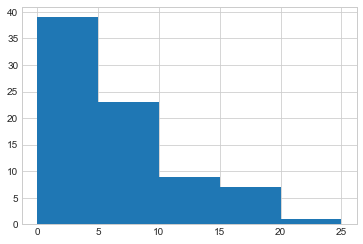

In [11]:
(n,bins,patch)=plt.hist(stats.Parts,bins=[0,5,10,15,20,25])
print(n)
print(n/stats.Parts.count())
print(stats[stats.Parts<2].Parts.count())
print(stats[stats.Parts<2].Parts.count()/stats.Parts.count())

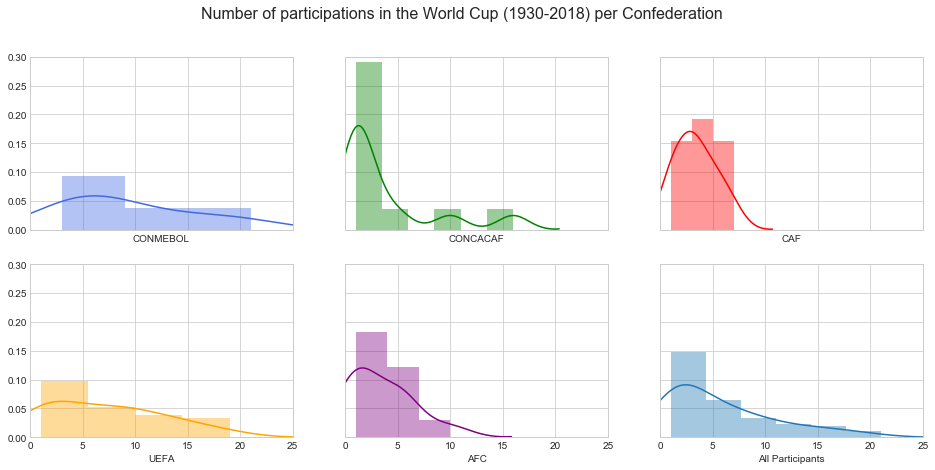

In [12]:
f2, axes = plt.subplots(2,3, figsize = (16,7), sharex=True, sharey=True)
c1 = sns.distplot(stats[stats.Confederation == 'CONMEBOL'].Parts, axlabel='CONMEBOL', ax = axes[0,0], color = 'royalblue')
c2 = sns.distplot(stats[stats.Confederation == 'CONCACAF'].Parts, axlabel='CONCACAF', ax = axes[0,1], color = 'green')
c3 = sns.distplot(stats[stats.Confederation == 'CAF'].Parts, axlabel='CAF', ax = axes[0,2], color = 'red')
c4 = sns.distplot(stats[stats.Confederation == 'UEFA'].Parts, axlabel='UEFA', ax = axes[1,0], color = 'orange')
c5 = sns.distplot(stats[stats.Confederation == 'AFC'].Parts, axlabel='AFC', ax = axes[1,1], color = 'purple')
c = sns.distplot(stats.Parts, axlabel='All Participants', ax = axes[1,2])
c1.set(xlim = (0,25), ylim = (0,0.3))
f2.suptitle('Number of participations in the World Cup (1930-2018) per Confederation',size=16)

f2.savefig('02NumberPartcipations.png', dpi=300)
plt.show()

There's a notable consistency of most UEFA and CONMEBOL teams in qualifying for World Cups. CONCACAF, CAF and AFC teams have, in general, fewer appearances, but a relative larger number of new teams representing them in the World Cup, which indicates a higher rotation in their continental qualifiers. USA and Mexico are outliers in the CONCACAF participations chart.

 - - -

## 2. Proportion of Points per Match Played broken down by Confederation

In [13]:
stats.head()

,Pos,Team,Parts,Pld,W,D,L,GF,GA,GD,Pts,AvgPts,BestFinish,Confederation
0,1,Brazil,21,109,73,18,18,229,105,124,237,2.17,Winner (5 times),CONMEBOL
1,2,Germany,19,109,67,20,22,226,125,101,221,2.03,Winner (4 times),UEFA
2,3,Italy,18,83,45,21,17,128,77,51,156,1.88,Winner (4 times),UEFA
3,4,Argentina,17,81,43,15,23,137,93,44,144,1.78,Winner (2 times),CONMEBOL
4,5,France,15,66,34,13,19,120,77,43,115,1.74,Winner (2 times),UEFA


In [14]:
stats.groupby('Confederation').mean()

,Pos,Parts,Pld,W,D,L,GF,GA,GD,Pts,AvgPts
Confederation,,,,,,,,,,,
AFC,56.090909,3.454545,11.090909,1.727273,2.363636,7.000000,8.909091,22.727273,-13.818182,7.545455,0.420909
CAF,49.230769,3.384615,10.923077,2.230769,2.846154,5.846154,10.461538,17.615385,-7.153846,9.538462,0.772308
CONCACAF,56.363636,3.818182,12.818182,2.818182,2.727273,7.272727,12.000000,25.363636,-13.363636,11.181818,0.554545
CONMEBOL,25.222222,9.444444,40.222222,19.555556,7.777778,12.888889,65.222222,50.333333,14.888889,66.444444,1.293333
OFC,61.000000,2.000000,6.000000,0.000000,3.000000,3.000000,4.000000,14.000000,-10.000000,3.000000,0.500000
UEFA,29.235294,7.235294,30.205882,13.117647,6.823529,10.264706,46.794118,38.911765,7.882353,46.176471,1.300294


In [15]:
import statsmodels.api as sm
stat=stats[stats.Confederation=='CONMEBOL']
X=stat.Pld
Y=stat.Pts
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

x=stat.Pld
y=stat.Pts
z = np.polyfit(x,y,deg=1)

In [16]:
z

array([  2.19080622, -21.67465006])

In [17]:
results.params

const   -21.674650
Pld       2.190806
dtype: float64

In [18]:
results.predict()

array([217.12322759, 155.78065352, 101.01049809,  50.6219551 ,
        37.4771178 ,  26.52308671,  17.75986184,   0.23341211,
        -8.52981276])

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Pts   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     264.1
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           8.13e-07
Time:                        16:35:51   Log-Likelihood:                -34.950
No. Observations:                   9   AIC:                             73.90
Df Residuals:                       7   BIC:                             74.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.6747      7.010     -3.092      0.018     -38.251      -5.098
Pld            2.1908      0.135     16.252      0.000       1.872       2.510
==============================================================================
Omnibus:                        0.845   Durbin-Watson:                   1.097
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.601
Skew:                           0.192   Prob(JB):                        0.741
Kurtosis:                       1.794   Cond. No.                         82.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

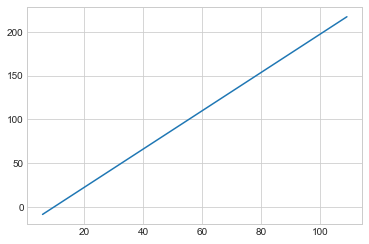

In [20]:
plt.plot(x,results.params.const + results.params.Pld*x)

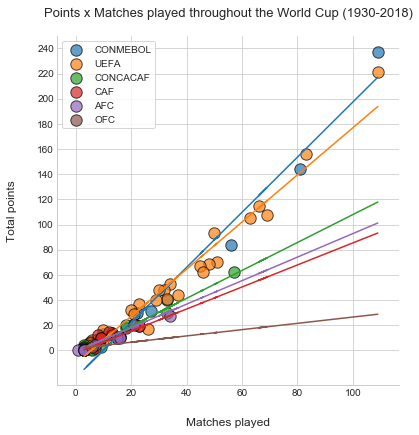

In [21]:
sns.set_style('whitegrid')
f3 = sns.lmplot(data=stats, x='Pld', y='Pts', hue='Confederation', fit_reg=False, size=5.5, 
            scatter_kws=dict(s=130, edgecolor = 'black', alpha=0.7),
           legend = False, hue_order=['CONMEBOL', 'UEFA', 'CONCACAF', 'CAF', 'AFC','OFC'])
plt.legend(prop={'size':10}, frameon=True, facecolor='white')
plt.title('Points x Matches played throughout the World Cup (1930-2018)',size=13, y=1.04)
plt.xlabel('Matches played',size=12, labelpad=20)
plt.ylabel('Total points',size=12, labelpad=20)
plt.yticks(np.arange(0,stats.Pts.max()+10,20))
plt.xticks(np.arange(0,stats.Pld.max()+10,20))

for i in stats.Confederation.unique():
    stat=stats[stats.Confederation==i]
    x=stat.Pld
    y=stat.Pts
    z = np.polyfit(x,y,deg=1)
    p = np.poly1d(z)
    #new x (whole axis)
    x=stats[stats.Confederation=='UEFA'].Pld
    plt.plot(x,p(x))

f3.savefig('03PointsPerMatch.png', dpi=300)
plt.show()

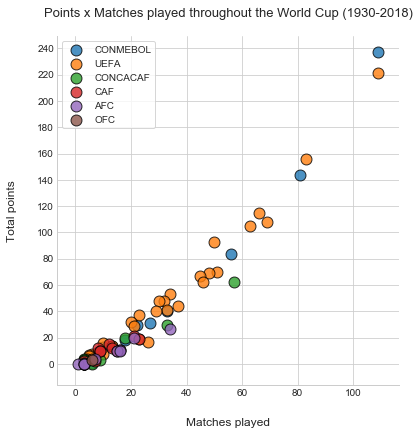

In [22]:
sns.set_style('whitegrid')
f3 = sns.lmplot(data=stats, x='Pld', y='Pts', hue='Confederation', fit_reg=False, size=5.5, scatter_kws=dict(s=120, edgecolor = 'black'), 
           legend = False, hue_order=['CONMEBOL', 'UEFA', 'CONCACAF', 'CAF', 'AFC','OFC'])
plt.legend(prop={'size':10}, frameon=True, facecolor='white')
plt.title('Points x Matches played throughout the World Cup (1930-2018)',size=13, y=1.04)
plt.xlabel('Matches played',size=12, labelpad=20)
plt.ylabel('Total points',size=12, labelpad=20)
plt.yticks(np.arange(0,stats.Pts.max()+10,20))
plt.xticks(np.arange(0,stats.Pld.max()+10,20))

f3.savefig('030PointsPerMatch.png', dpi=300)
plt.show()

The graph shows the ratio of total points per match played for each team. There're some clusters of teams with similar performances. Brazil and Germany are the teams with overall best performances in the World Cup history, with a slight superiority from the South American side (16 points more and same number of games).

Those two teams are ahead of a second group made of Italy and Argentina. The third evident group is solely made of UEFA teams (France, England and Spain).

The seven teams previously addressed, along with Uruguay, are the only champions of the tournament in the period, which corroborates the strong relation of total points per matches played to final team accomplishments. The Netherlands are an exception though, Besides having reached three finals in the tournament and having great points to matches ratio, their national team have not yet lifted the WC trophy.

Netherlands and Uruguay, along with Sweden, Belgium, Russia, Serbia, and Mexico fill up the fourth group. The remaining teams make a latter cluster and are the biggest group in the plot.

In [23]:
linear = pd.DataFrame.from_dict(dict([('Confederation',['CONMEBOL', 'UEFA', 'CONCACAF', 'AFC', 'CAF']), 
                      ('y',['2.1908x - 21.675', '1.8738x - 10.424', '1.0875x - 2.0041', '0.8783x - 2.1962', '0.8264x + 1.0556'])]))
linear

,Confederation,y
0,CONMEBOL,2.1908x - 21.675
1,UEFA,1.8738x - 10.424
2,CONCACAF,1.0875x - 2.0041
3,AFC,0.8783x - 2.1962
4,CAF,0.8264x + 1.0556


In [24]:
for i in stats.Confederation.cat.categories:
    print(i + ': ' + str(stats[stats.Confederation==i].corr().Pld[8]))

AFC: -0.8229432256024731
CAF: -0.5274443180906159
CONCACAF: -0.8900781788697123
CONMEBOL: 0.9240167447484445
OFC: nan
UEFA: 0.7918691282424108


---

The graph below presents the dispersion plot of points per matches played divided by each Confederation. CONMEBOL has the biggest line tendency slope (2.1908), indicating that, as a whole, their teams have the best overall performances. The South Americans are followed by UEFA teams, with a slope value of 1.8738. The next confederations are, in order, CONCACAF (1.0875), AFC (0.8783), and CAF (0.8264). As OFC is made of one single team, they are not analyzed here.

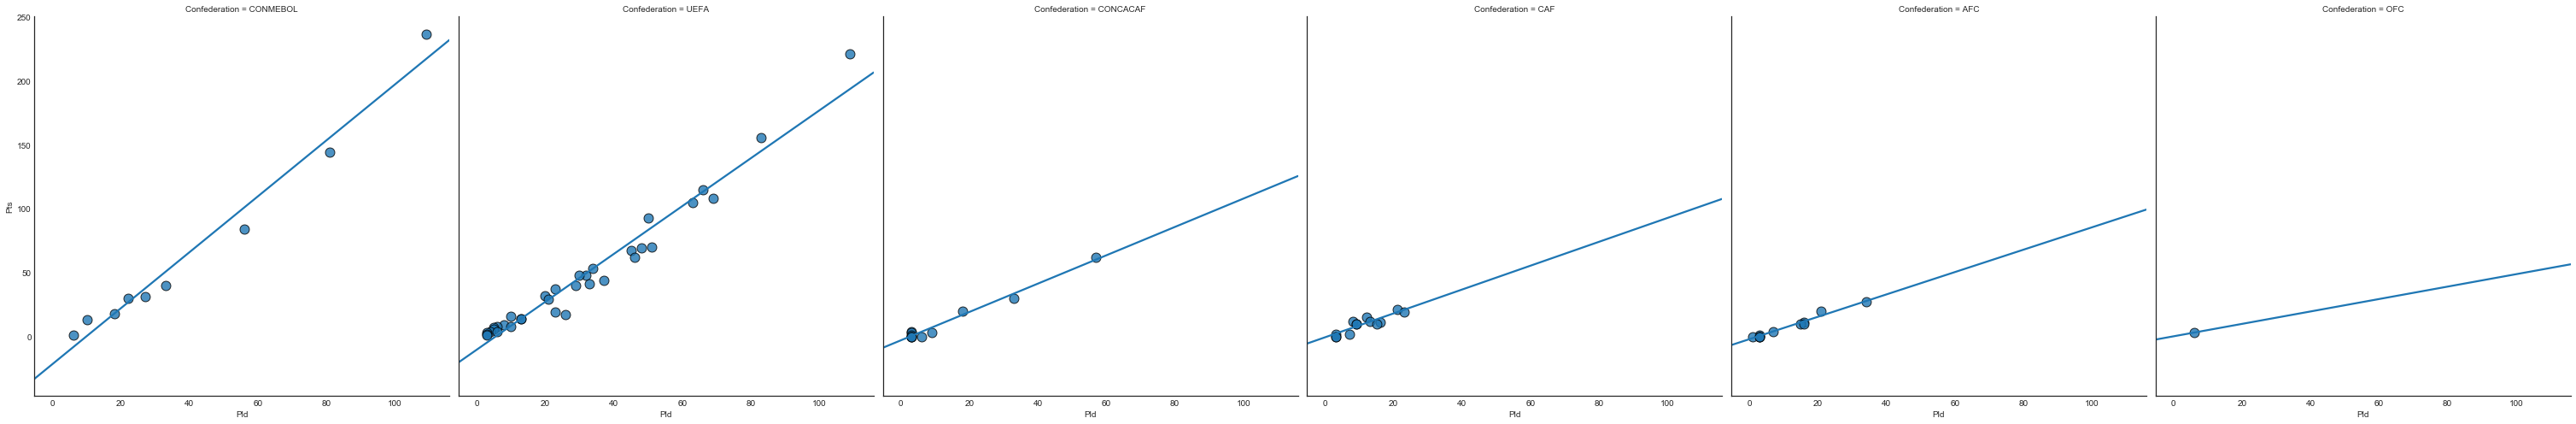

In [25]:
sns.set_style('white')
f3 = sns.lmplot(data=stats, x='Pld', y='Pts', col='Confederation', col_order=['CONMEBOL','UEFA','CONCACAF','CAF','AFC','OFC'], 
           size=7, scatter_kws=dict(s=120, edgecolor = 'black'), ci = None)
f3.savefig('04PointsPerMatch.png', dpi=300)
plt.show()

In [26]:
stats.Confederation.cat.categories

Index(['AFC', 'CAF', 'CONCACAF', 'CONMEBOL', 'OFC', 'UEFA'], dtype='object')

***

## 3. Goals Scored in the World Cup

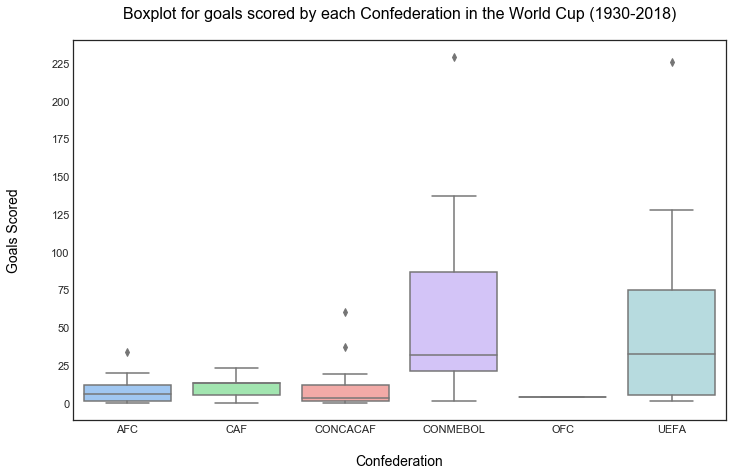

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 7)
sns.boxplot(data=stats, x=stats.Confederation, y = stats.GF, palette='pastel') 
#'pastel', sns.color_palette("Paired"),
plt.ylabel('Goals Scored', color = 'black', fontsize = 14, labelpad=30)
plt.xlabel('Confederation', color = 'black', fontsize = 14, labelpad=20)
plt.xticks(fontsize=11)
plt.yticks(np.arange(0,250,25),fontsize=11)
plt.title('Boxplot for goals scored by each Confederation in the World Cup (1930-2018)', 
          fontsize=16, color='black', fontname='Arial', y=1.04)
fig.savefig('05GoalsScored.png', dpi=300)

plt.show()

There's a predominance of CONMEBOL and UEFA in goals scored, with a slight better relative performance from the South Americans. It's also compelling to highlight the outliers in those confederations. Brazil (229 goals) and Germany (226 goals) lead their leagues in Goals Scored by a substancially large margin. Throughout the World Cups, the German sides scored 98 more goals than the Italians (the second-best scorers from UEFA) while the Brazilians outscored Argentina by 92 goals.

Mexico (60 goals) and USA (37 goals) are outliers in CONCACAF and so is South Korea (34 goals) in the AFC group. 

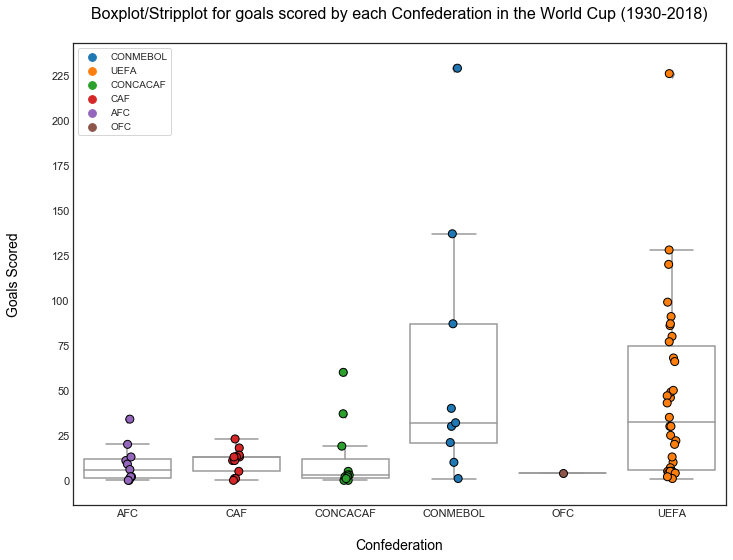

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.5)
sns.boxplot(data=stats, x=stats.Confederation, y = stats.GF, color = 'white') #palette='pastel'
sns.stripplot(data=stats, x=stats.Confederation, y = stats.GF, hue=stats.Confederation, linewidth=1,
              hue_order= ['CONMEBOL', 'UEFA', 'CONCACAF', 'CAF', 'AFC','OFC'], size=8, edgecolor='black', jitter=0.04)
#'pastel', sns.color_palette("Paired"),
plt.ylabel('Goals Scored', color = 'black', fontsize = 14, labelpad=30)
plt.xlabel('Confederation', color = 'black', fontsize = 14, labelpad= 20)
plt.xticks(fontsize=11)
plt.yticks(np.arange(0,250,25),fontsize=11)
plt.title('Boxplot/Stripplot for goals scored by each Confederation in the World Cup (1930-2018)', 
          fontsize=16, color='black', fontname='Arial', y=1.04)
plt.legend(frameon=True)
fig.savefig('06GoalsScored.png', dpi=300)

plt.show()

The plot highlights the influence each country has in the box shape. It's noticeable the high number of teams UEFA sends to the World Cup compared to the other Confederations and also that, except for Germany, UEFA teams are more evenly spread out along the box plot than the CONMEBOL and CONCACAF teams, though not as much as the CAF and AFC sides.

In [29]:
stats.Confederation.unique()

[CONMEBOL, UEFA, CONCACAF, AFC, CAF, OFC]
Categories (6, object): [CONMEBOL, UEFA, CONCACAF, AFC, CAF, OFC]

---

## 4. Analysis of Games Won and Lost 

In [30]:
stats[stats.Confederation=='CONMEBOL'][1:]

,Pos,Team,Parts,Pld,W,D,L,GF,GA,GD,Pts,AvgPts,BestFinish,Confederation
3,4,Argentina,17,81,43,15,23,137,93,44,144,1.78,Winner (2 times),CONMEBOL
8,9,Uruguay,13,56,24,12,20,87,74,13,84,1.50,Winner (2 times),CONMEBOL
20,21,Chile,9,33,11,7,15,40,49,-9,40,1.21,Third place,CONMEBOL
23,24,Paraguay,8,27,7,10,10,30,38,-8,31,1.15,Quarter-finals,CONMEBOL
24,25,Colombia,6,22,9,3,10,32,30,2,30,1.36,Quarter-finals,CONMEBOL
33,34,Peru,5,18,5,3,10,21,33,-12,18,1.00,Quarter-finals,CONMEBOL
39,40,Ecuador,3,10,4,1,5,10,11,-1,13,1.30,Second round,CONMEBOL
68,69,Bolivia,3,6,0,1,5,1,20,-19,1,0.17,First round,CONMEBOL


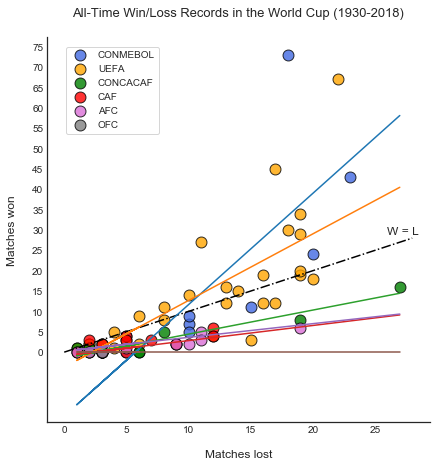

In [31]:
flatui = ["royalblue", "orange", "green", "red", "orchid", 'grey']
v = sns.lmplot(data=stats, x = 'L',y = 'W', markers='o', hue = 'Confederation', fit_reg=False, size = 6, 
                palette=sns.color_palette(flatui), legend = False,
                hue_order=['CONMEBOL', 'UEFA', 'CONCACAF', 'CAF', 'AFC','OFC'], 
               scatter_kws=dict(s=120, edgecolor = 'black', alpha = 0.8))
plt.plot([0,28],[0,28],ls='-.',color='black')
plt.annotate('W = L', xy=(25,25), xytext=(26,29), size=12)
plt.xlabel('Matches lost',size=12, labelpad=15)
plt.ylabel('Matches won',size=12, labelpad=15)
plt.yticks(np.arange(0,80,5))
plt.title('All-Time Win/Loss Records in the World Cup (1930-2018)', size=13, y=1.04)
plt.legend(prop={'size':10}, frameon=True, facecolor='white', loc=(0.05,.75))

for i in stats.Confederation.unique():
    stat=stats[stats.Confederation==i]
    x=stat.L
    y=stat.W
    z = np.polyfit(x,y,deg=1)
    p = np.poly1d(z)
    x=stats[stats.Confederation=='CONCACAF'].L
    plt.plot(x,p(x))

v.savefig('070GamesWonLost.png', dpi=300)
plt.show()

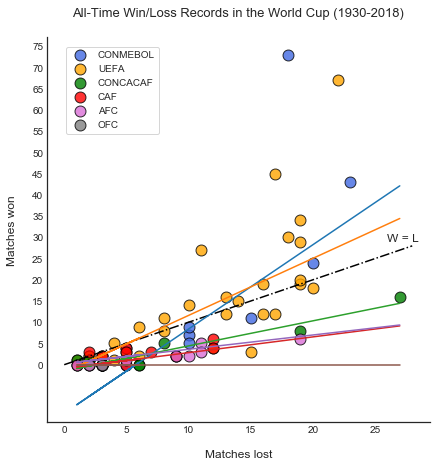

In [32]:
# BRAZIL AND GERMANY NOT CONSIDERED
flatui = ["royalblue", "orange", "green", "red", "orchid", 'grey']
v = sns.lmplot(data=stats, x = 'L',y = 'W', markers='o', hue = 'Confederation', fit_reg=False, size = 6, 
                palette=sns.color_palette(flatui), legend = False,
                hue_order=['CONMEBOL', 'UEFA', 'CONCACAF', 'CAF', 'AFC','OFC'], 
               scatter_kws=dict(s=120, edgecolor = 'black', alpha = 0.8))
plt.plot([0,28],[0,28],ls='-.',color='black')
plt.annotate('W = L', xy=(25,25), xytext=(26,29), size=12)
plt.xlabel('Matches lost',size=12, labelpad=15)
plt.ylabel('Matches won',size=12, labelpad=15)
plt.yticks(np.arange(0,80,5))
plt.title('All-Time Win/Loss Records in the World Cup (1930-2018)', size=13, y=1.04)
plt.legend(prop={'size':10}, frameon=True, facecolor='white', loc=(0.05,.75))

for i in stats.Confederation.unique():
    if i == 'CONMEBOL' or i == 'UEFA':
        stat=stats[stats.Confederation==i][1:]
    else:
        stat=stats[stats.Confederation==i]
    x=stat.L
    y=stat.W
    z = np.polyfit(x,y,deg=1)
    p = np.poly1d(z)
    x=stats[stats.Confederation=='CONCACAF'].L
    plt.plot(x,p(x))

plt.show()

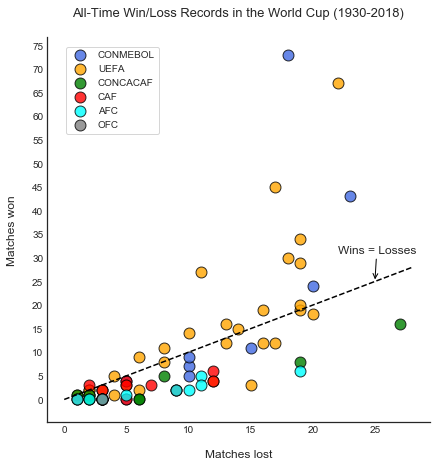

In [33]:
flatui = ["royalblue", "orange", "green", "red", "cyan", 'grey']
v = sns.lmplot(data=stats, x = 'L',y = 'W', markers='o', hue = 'Confederation', fit_reg=False, size = 6, 
                palette=sns.color_palette(flatui), legend = False,
                hue_order=['CONMEBOL', 'UEFA', 'CONCACAF', 'CAF', 'AFC','OFC'], 
               scatter_kws=dict(s=120, edgecolor = 'black', alpha = 0.8))
plt.plot([0,28],[0,28],ls='--',color='black')
plt.annotate('Wins = Losses', xy=(25,25), xytext=(22,31), arrowprops=dict(arrowstyle='->'), size=12)
plt.xlabel('Matches lost',size=12, labelpad=15)
plt.ylabel('Matches won',size=12, labelpad=15)
plt.yticks(np.arange(0,80,5))
plt.title('All-Time Win/Loss Records in the World Cup (1930-2018)', size=13, y=1.04)
plt.legend(prop={'size':10}, frameon=True, facecolor='white', loc=(0.05,.75))
v.savefig('07GamesWonLost.png', dpi=300)
plt.show()

Out of the 79 teams that have already competed in the World Cup, only 22.8% (18) of them won more matches than lost them along the history of the tournament. Those 18 teams consist of 12 UEFA teams (Germany, Italy, France, England, Spain, Netherlands, Belgium, Russia, Poland, Hungary, Portugal, Croatia, Denmark, and Turkey), 3 CONMEBOL teams (Brazil, Argentina and Uruguay), and one CAF national team (Senegal). By confederation, 41.18% of the UEFA nations achieved this feat, while 33.33% of the CONMEBOL teams and 7.69% of the CAF teams have also done so. No team from CONCACAF, AFC, and OFC have a positive win/loss ratio.

Brazil and Germany head the chart, followed by Italy and Argentina. The Brazilian team is the side with the best performance along the tournament, having won 73 matches and lost 18.

Another team that stands out in the scatter plot (though not in a good way) is Mexico. The CONCACAF team is the side with the highest number of games lost in the World Cup. Granted Mexico is also one of the teams that's played more WC games throughout the history. Even so, their win-loss difference (-11) is still one of the lowest among the teams, being only ahead of South Korea (-13) and Bulgaria (-12), while sharing the position with the USA (-11).

In [34]:
stats['W-L'] = stats.W - stats.L
stats.sort_values('W-L').head()

,Pos,Team,Parts,Pld,W,D,L,GF,GA,GD,Pts,AvgPts,BestFinish,Confederation,W-L
27,28,South Korea,10,34,6,9,19,34,70,-36,27,0.79,Fourth place,AFC,-13
34,35,Bulgaria,7,26,3,8,15,22,53,-31,17,0.65,Fourth place,UEFA,-12
25,26,United States,10,33,8,6,19,37,62,-25,30,0.91,Third place,CONCACAF,-11
13,14,Mexico,16,57,16,14,27,60,98,-38,62,1.09,Quarter-finals,CONCACAF,-11
48,49,Australia,5,16,2,4,10,13,31,-18,10,0.63,Second round,AFC,-8


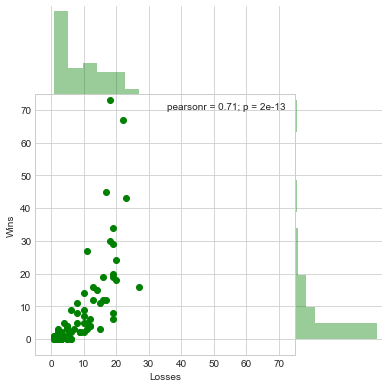

In [35]:
sns.set_style('whitegrid')
h=sns.jointplot(data=stats,x='L', y='W', size=5.5, ratio = 3, space = 0.0, color = 'green',
                xlim=(-5,75), ylim=(-5,75)). set_axis_labels('Losses', 'Wins')
h.savefig('08GamesWonLost.png', dpi=300)
plt.show()

The joint plot allows us to notice how the number of losses are better distributed than the number of wins. It's also relevant to note that, out of every country that has already played a World Cup, only 41.77% of them have won more than 5 matches (important note: penalty shootouts count as draws on the table).

In [36]:
stats[stats.W>=5].W.count()/stats.W.count()

0.4177215189873418

In [37]:
stats[stats.L<=5].W.count()/stats.L.count()

0.4430379746835443

In [38]:
for i in stats[stats.W>stats.L].Team: 
    print(i, sep=' ', end=', ')

Brazil, Germany, Italy, Argentina, France, England, Spain, Netherlands, Uruguay, Belgium, Russia, Poland, Hungary, Portugal, Croatia, Denmark, Turkey, Senegal, 

In [39]:
# Percentage of UEFA teams with more WINS than LOSES
len(stats[(stats.Confederation == 'UEFA') & (stats.W>stats.L)])/len(stats[stats.Confederation == 'UEFA'])

0.4117647058823529

In [40]:
# Percentage of CONMEBOL teams with more WINS than LOSES
len(stats[(stats.Confederation == 'CONMEBOL') & (stats.W>stats.L)])/len(stats[stats.Confederation == 'CONMEBOL'])

0.3333333333333333

In [41]:
# Percentage of CAF teams with more WINS than LOSES
len(stats[(stats.Confederation == 'CAF') & (stats.W>stats.L)])/len(stats[stats.Confederation == 'CAF'])

0.07692307692307693

In [42]:
# Percentage of teams with more WINS than LOSSES
len(stats[stats.W>stats.L])/len(stats)
# 12 UEFA 3 CONMEBOL 1 CAF

0.22784810126582278

---

## 4. Best Finish in the World Cup

In [43]:
stats.BestFinish.unique()

[Winner (5 times), Winner (4 times), Winner (2 times), Winner (1 time), Runners-up, Third place, Fourth place, Quarter-finals, Second round, First round]
Categories (10, object): [Winner (5 times), Winner (4 times), Winner (2 times), Winner (1 time), ..., Fourth place, Quarter-finals, Second round, First round]

In [44]:
lista=[]
soma=0
for i in stats.BestFinish.unique():
    for j in stats.BestFinish:
        if i==j:
            soma+=1
    print(i +': '+ str(soma))
    lista.append(soma)
    soma=0

Winner (5 times): 1
Winner (4 times): 2
Winner (2 times): 3
Winner (1 time): 2
Runners-up: 5
Third place: 7
Fourth place: 4
Quarter-finals: 18
Second round: 10
First round: 27


In [45]:
percentage_best_finish = np.round((np.array(lista)/len(stats))*100,2)

In [46]:
best_finish_data=pd.DataFrame({'BestFinish': np.array(stats.BestFinish.unique()),
                              'Ocasions': np.array(lista),
                              'Percentage': np.array(percentage_best_finish)})

In [47]:
best_finish_data

,BestFinish,Ocasions,Percentage
0,Winner (5 times),1,1.27
1,Winner (4 times),2,2.53
2,Winner (2 times),3,3.80
3,Winner (1 time),2,2.53
4,Runners-up,5,6.33
5,Third place,7,8.86
6,Fourth place,4,5.06
7,Quarter-finals,18,22.78
8,Second round,10,12.66
9,First round,27,34.18


In [48]:
# Percentage of teams that have won the WC
best_finish_data[:4].Percentage.sum()

10.129999999999999

In [49]:
# Percentage of teams that have reached at least semi-finals
best_finish_data[:7].Percentage.sum()

30.38

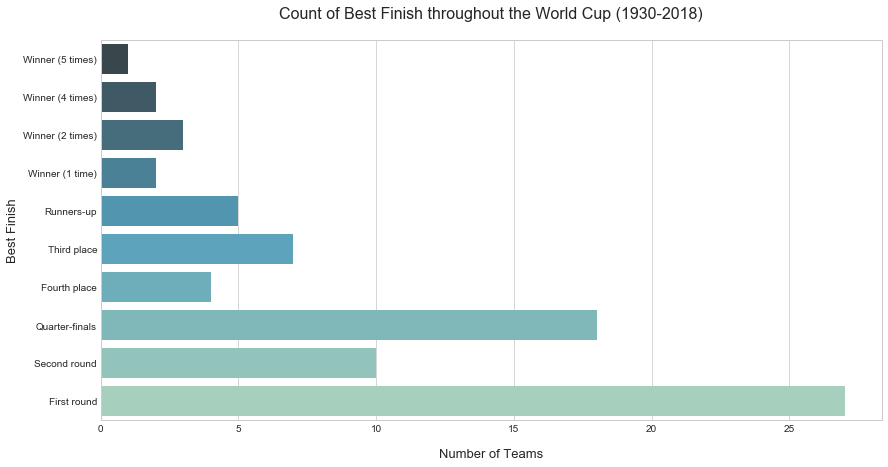

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
sns.barplot(data=best_finish_data, x=best_finish_data.Ocasions, y=best_finish_data.BestFinish,
            palette='GnBu_d')
plt.xlabel('Number of Teams', size=13, labelpad=15)
plt.ylabel('Best Finish', size=13)
plt.title('Count of Best Finish throughout the World Cup (1930-2018)', size=16, y=1.04)
fig.savefig('09BestFinish.png', dpi=300)
plt.show()

Most teams (34.18%) have never got through the first round (group stages) and, interestingly enough, more teams have achieved the quarter-finals than the round of 16 as their best-result.

Out of the 79 teams that have already participated in the World Cup, 10.13% of them have won the tournament at least once, and 30.38% of them have finished at least one time among the four best teams.

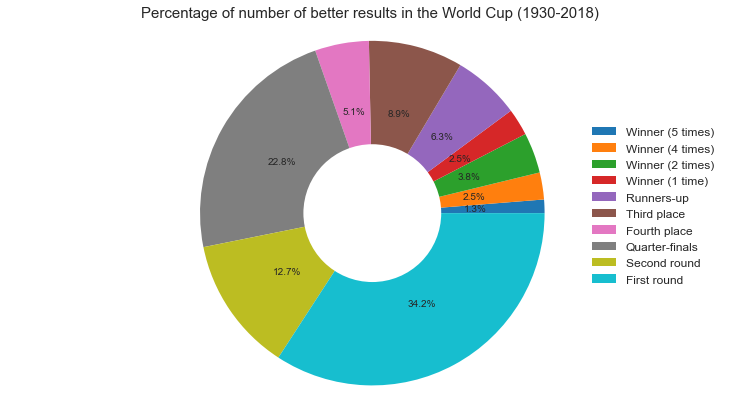

In [51]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches((13,7))
ax1.pie(x=best_finish_data.Ocasions, radius=2, autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.8,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.legend(best_finish_data.BestFinish, fontsize = 12, loc = (.8,.3))
plt.title('Percentage of number of better results in the World Cup (1930-2018)', size=15)
fig.savefig('10BestFinish.png', dpi=300)
plt.show()

More than a third (34.2%) of the teams have never once got through the group stages, and almost half of them (46.9%) have never advanced past second round.

---

## 5. Goal Difference

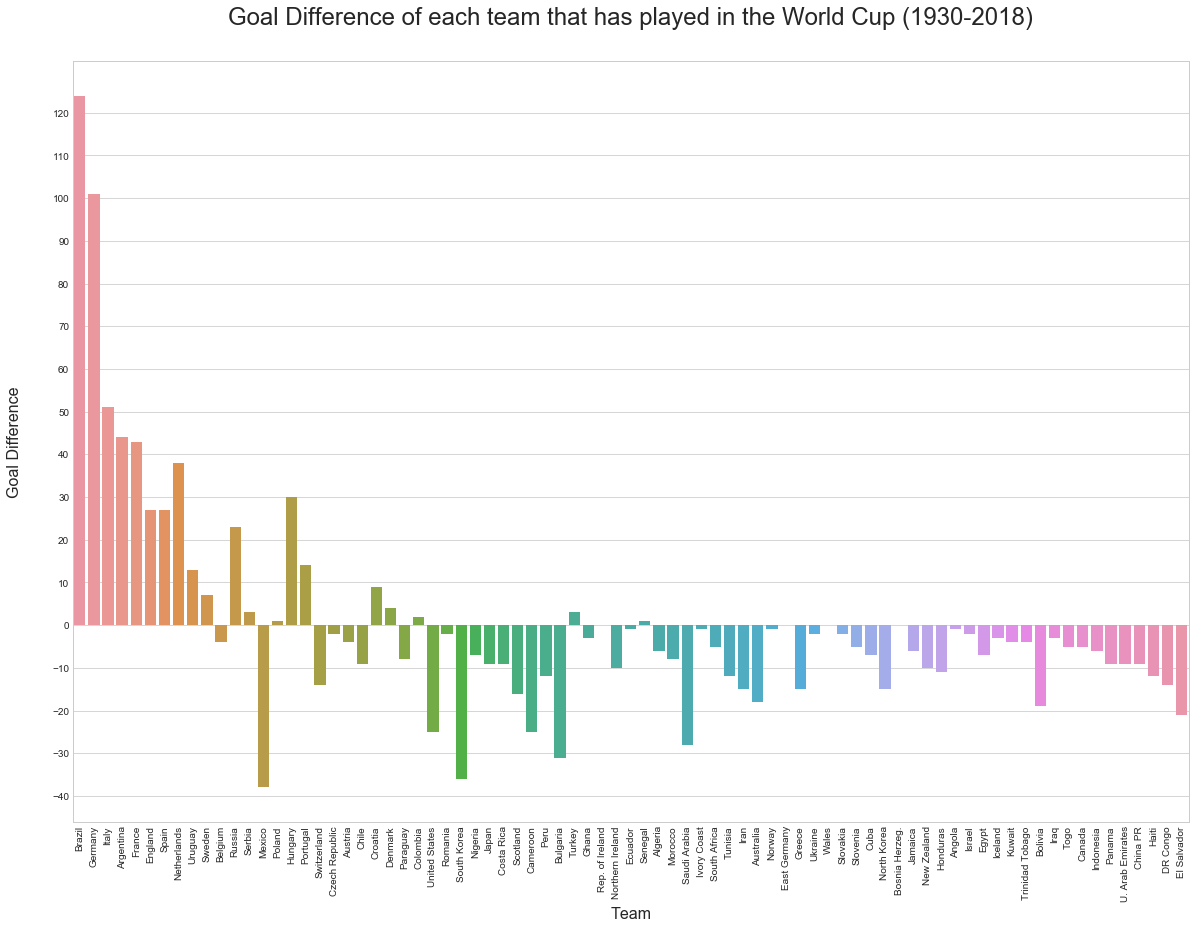

In [52]:
f, ax = plt.subplots(figsize=(20, 14))
sns.barplot(data=stats,x=stats.Team, y=stats.GD)
plt.title('Goal Difference of each team that has played in the World Cup (1930-2018)', size=24, y=1.04)
plt.xticks(rotation=90)
plt.yticks(np.arange(-40,130,10))
plt.xlabel('Team', size=16, labelpad=5)
plt.ylabel('Goal Difference', size=16, labelpad=30)
f.savefig('11GoalDifference.png', dpi=300)
plt.show()

Brazil leads the "Goal difference (GD)" stat with 124 more goals scored than conceded. They're followed by Germany, with a positive 101 Goal Difference. Those two teams create a significant gap between them and the next ones in the rank. Italy, the country with the third best stat, have a "GD" of 51, while Argentina (4th) and France (5th) have, respectively, 44 and 43 goal difference.

Mexico is the team with the worst Goal Difference throughout the history of the tournament (-38), followed by South Korea (-36), Bulgaria (-31), and Saudi Arabia (-28).

In [53]:
stats[stats.GD<0].GD.count()

55

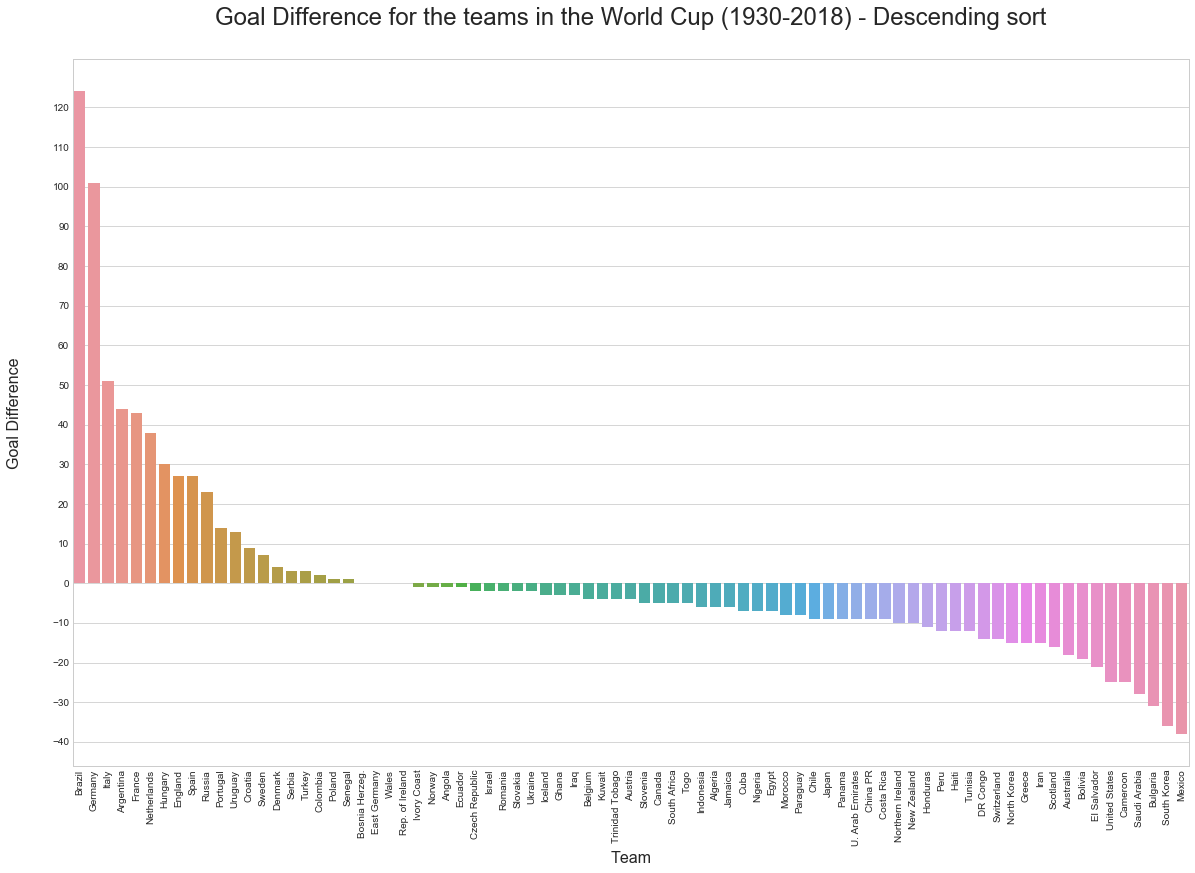

In [54]:
f, ax = plt.subplots(figsize=(20, 13))
sns.barplot(data=stats,x=stats.sort_values('GD', ascending=False).Team, y=stats.GD)
plt.title('Goal Difference for the teams in the World Cup (1930-2018) - Descending sort', size=24, y=1.04)
plt.xticks(rotation=90)
plt.yticks(np.arange(-40,130,10))
plt.xlabel('Team', size=16, labelpad=5)
plt.ylabel('Goal Difference', size=16, labelpad=30)
f.savefig('12GoalDifference.png', dpi=300)
plt.show()

Out of the 79 teams, only 20 of them (25.32%) have a positive Goal Difference, while four of them (5.06%) have a "GD" equaling zero, and 55 (69.62%) got a negative Goal Difference.

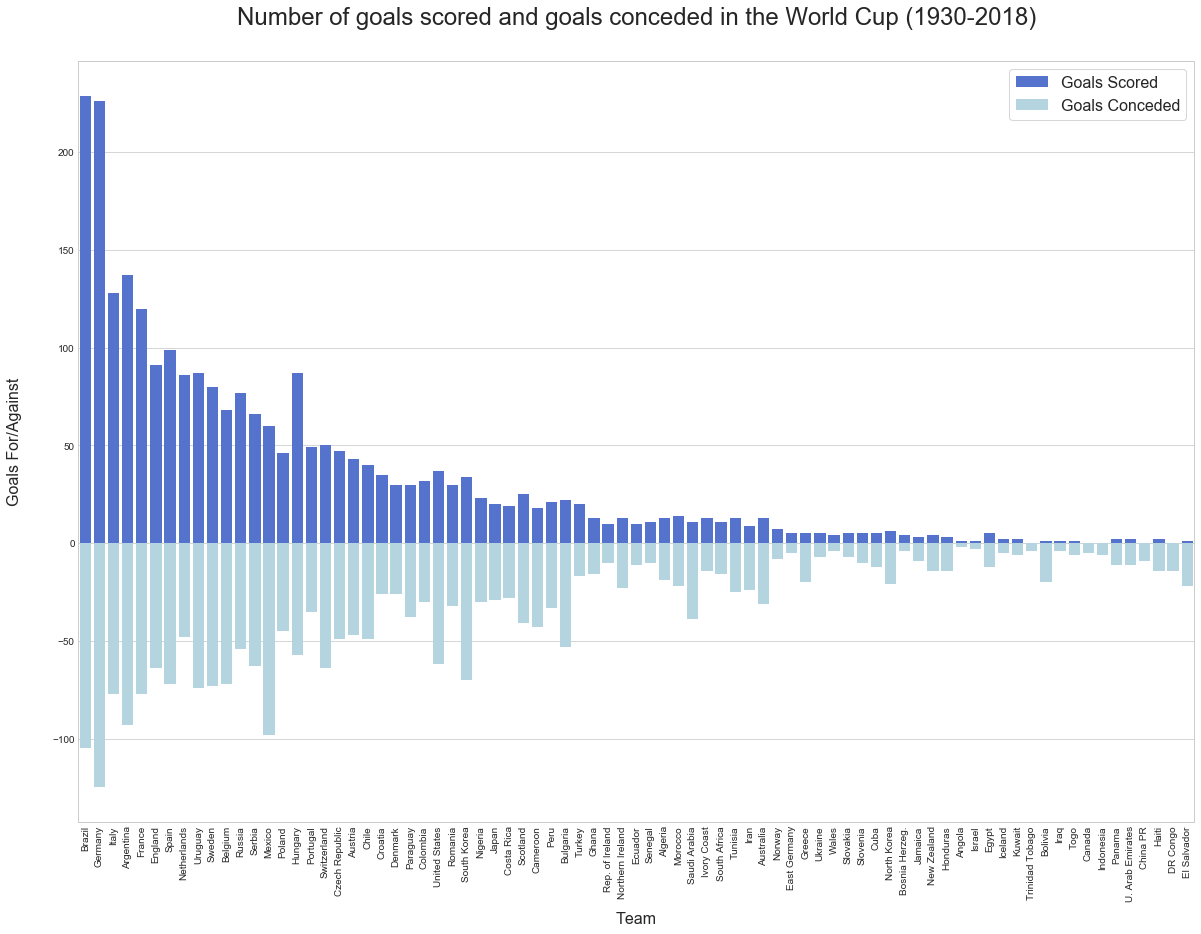

In [55]:
f, ax = plt.subplots(figsize=(20, 14))
sns.barplot(data=stats,x=stats.Team, y=stats.GF,color='royalblue', label='Goals Scored')
sns.barplot(data=stats,x=stats.Team, y=-stats.GA,color='lightblue', label='Goals Conceded')
plt.title('Number of goals scored and goals conceded in the World Cup (1930-2018)', size=24, y=1.04)
plt.xticks(rotation=90)
#plt.yticks(np.arange(-40,130,10))
plt.xlabel('Team', size=16, labelpad=10)
plt.ylabel('Goals For/Against', size=16, labelpad=30)
plt.legend(prop={'size': 16}, frameon = True, facecolor = 'white')
f.savefig('13GoalsScoredConceded.png', dpi=300)
plt.show()

A country that stands out on the "Goal Difference" and "Goals For" stats is Hungary. Despite not having many victories or many points along the history of the tournament, they show some noteworthy numbers in the goals scored stat. The Hungarian team have played 32 World Cup games, scoring 87 goals and conceding 57 goals. That feature leaves them with the biggest Goals Scored per match played ratio (2.72), ahead of Brazil (2.10), Germany (2.07), Turkey (2.00), and France (1.82).

As a side note, Hungary, the motherland of players like Ferenc Puskás and Sandor Kócsis, owns some of the biggest records in the World Cup, like Most goals scored in a single cup (27) and highest average goal difference in a single cup (+17). However, despite all the success in the 20th century, the Hungarian National Team have failed to qualify for the FIFA World Cup since 1986.

In [56]:
stats['AvgGF'] = stats.GF / stats.Pld
stats['AvgGA'] = stats.GA / stats.Pld

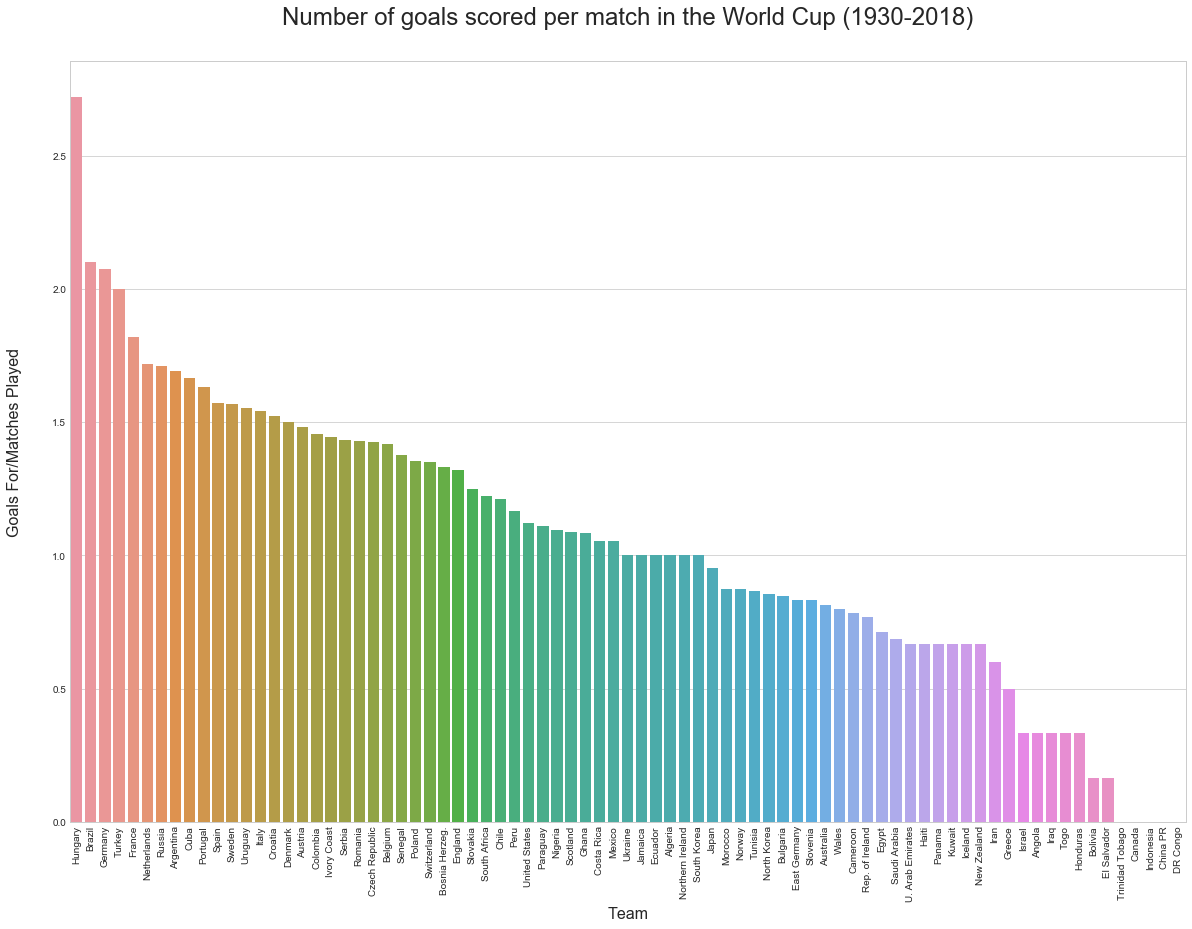

In [57]:
f, ax = plt.subplots(figsize=(20, 14))
sns.barplot(data = stats.sort_values('AvgGF',ascending=False), x='Team', y='AvgGF')
plt.title('Number of goals scored per match in the World Cup (1930-2018)', size=24, y=1.04)
plt.xticks(rotation=90)
plt.xlabel('Team', size=16, labelpad=5)
plt.ylabel('Goals For/Matches Played', size=16, labelpad=30)
f.savefig('14GoalsScoredPerMatch.png', dpi=300)
plt.show()

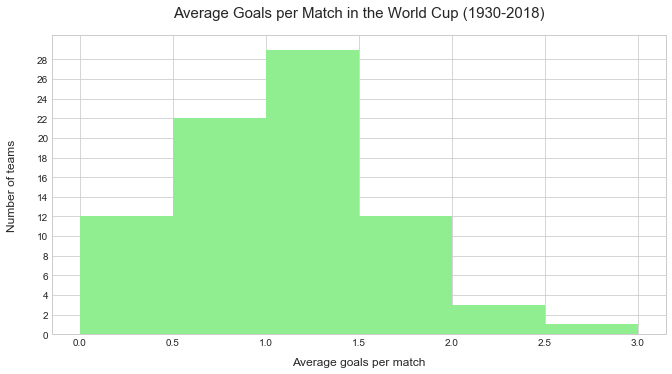

[12. 22. 29. 12.  3.  1.]


In [58]:
f, ax = plt.subplots(figsize=(11, 5.5))
stats[stats.AvgGF>=2]
stats[(stats.AvgGF>=1)&(stats.AvgGF<2)].count()
(n, bins, patch) = plt.hist(stats.AvgGF, bins=6, stacked=True, range=(0,3),color='lightgreen', histtype='bar')

plt.xlabel('Average goals per match', size=12, labelpad=10)
plt.ylabel('Number of teams', size=12, labelpad=20)
plt.yticks(np.arange(0,30,2))
plt.title('Average Goals per Match in the World Cup (1930-2018)', size=15, y=1.04)
plt.grid(True)
f.savefig('15GoalsScoredPerMatch.png', dpi=300)
plt.show()
print(n)

In [59]:
n/stats.Team.count()

array([0.15189873, 0.27848101, 0.36708861, 0.15189873, 0.03797468,
       0.01265823])

Hungary is the only team that has averaged more than 2.5 goals per game. The three teams which scored two or more goals but fewer than 2.5 goals are Brazil, Germany, and Turkey. Most of the teams (36.71%) have an average score in the interval between 1 goal and 1.5 goals.

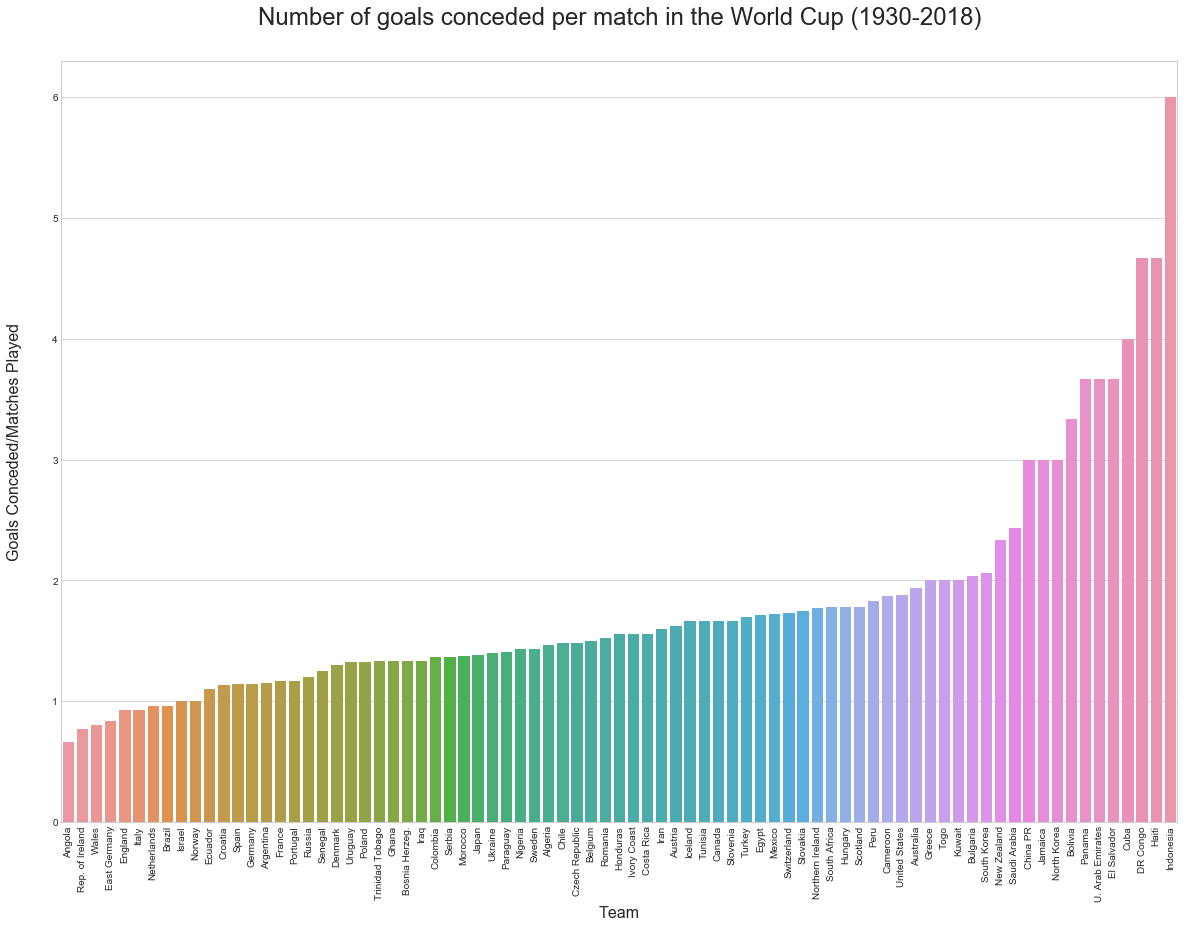

In [60]:
f, ax = plt.subplots(figsize=(20, 14))
sns.barplot(data = stats.sort_values('AvgGA'), x='Team', y='AvgGA')
plt.title('Number of goals conceded per match in the World Cup (1930-2018)', size=24, y=1.04)
plt.xticks(rotation=90)
#plt.yticks(np.arange(-40,130,10))
plt.xlabel('Team', size=16)
plt.ylabel('Goals Conceded/Matches Played', size=16, labelpad=30)
f.savefig('16GoalsConcededPerMatch.png', dpi=300)
plt.show()

---

## 6. Game Outcomes

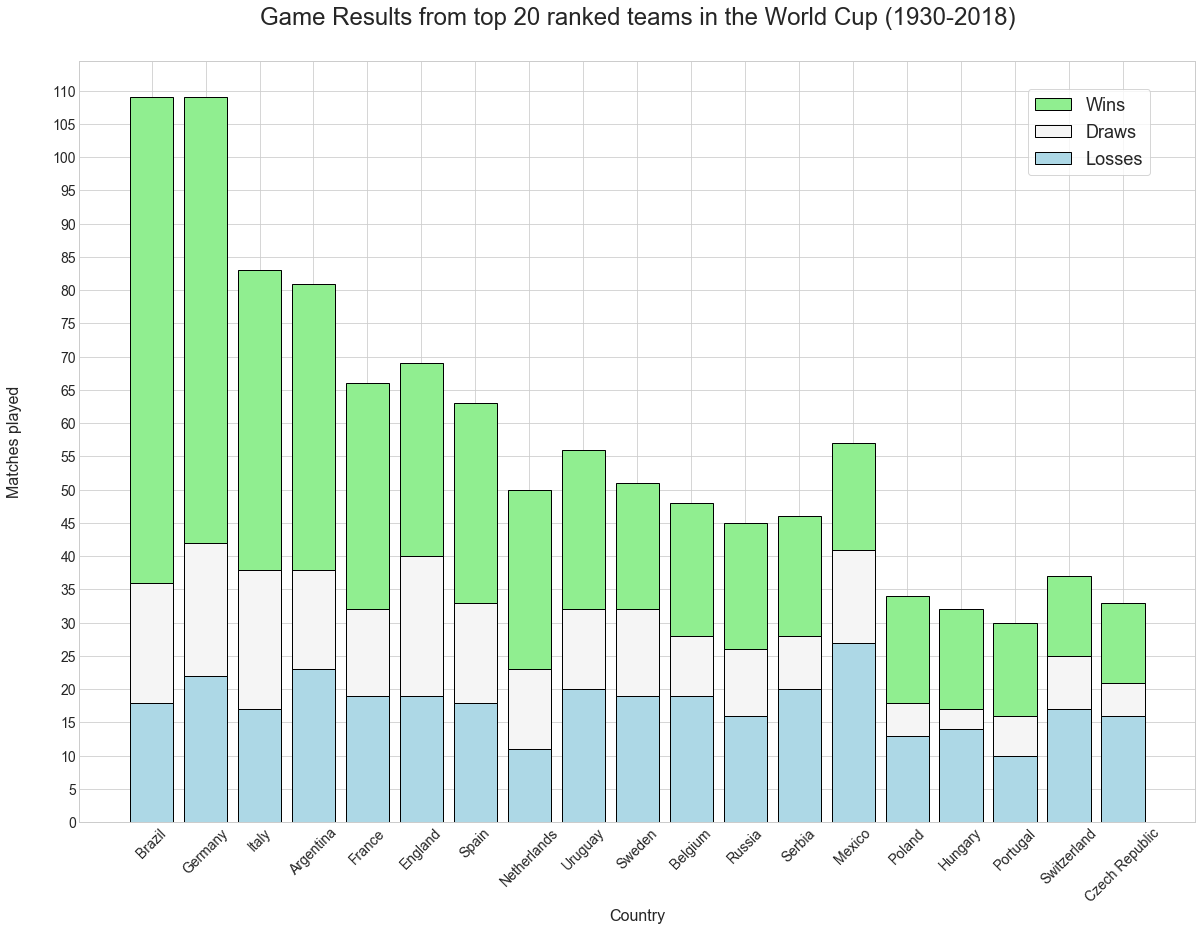

In [61]:
f, ax = plt.subplots(figsize=(20, 14))
L = plt.bar(stats[stats.Pos<20].Team, stats[stats.Pos<20].L, color='lightblue',edgecolor='black')
D = plt.bar(stats[stats.Pos<20].Team, stats[stats.Pos<20].D,
        bottom=stats[stats.Pos<20].L, color='whitesmoke', edgecolor='black')
W = plt.bar(stats[stats.Pos<20].Team, stats[stats.Pos<20].W, 
        bottom=(stats[stats.Pos<20].D+stats[stats.Pos<20].L), color='lightgreen', edgecolor='black')
plt.xlabel('Country',size=16)
plt.ylabel('Matches played',size=16, labelpad = 30)
plt.xticks(rotation=45,fontsize=14)
plt.yticks(np.arange(0,115,5),fontsize=14)
plt.legend((W,D,L),('Wins','Draws','Losses'), frameon = True, loc = (.85,.85), prop = {'size':18})
plt.title('Game Results from top 20 ranked teams in the World Cup (1930-2018)',size=24, y=1.04)
f.savefig('17MatchResults.png', dpi=300)
plt.show()

Brazil owns the highest ratio of wins per match played (66.97%), followed by Germany (61.47%), Italy (54.22%), Netherlands (54.00%), and Argentina (53.09%)

Brazil also leads the stats for fewest games lost per match played (16.51%), followed by Wales (20.00%), Germany (20.18%), Italy (20.48%), and the Netherlands (22.00%).

Among the top 20 teams, England heads the stats for most games drawn per matches played (30.43%), followed by Sweden (25.49%), Italy (25.30%), Mexico (24.56%), and the Netherlands (24.00%). Considering all the teams in this stat would not result in a very significant information, as most of the teams with few matches played have the highest average of games drawn and lost.

Below is presented the game results bar plot for each confederation in the period from 1930 to 2018.

In [62]:
stats['AvgW'] = stats.W/stats.Pld
stats['AvgL'] = stats.L/stats.Pld
stats['AvgD'] = stats.D/stats.Pld
stats.sort_values('AvgW',ascending=False).head()

,Pos,Team,Parts,Pld,W,D,L,GF,GA,GD,Pts,AvgPts,BestFinish,Confederation,W-L,AvgGF,AvgGA,AvgW,AvgL,AvgD
0,1,Brazil,21,109,73,18,18,229,105,124,237,2.17,Winner (5 times),CONMEBOL,55,2.100917,0.963303,0.669725,0.165138,0.165138
1,2,Germany,19,109,67,20,22,226,125,101,221,2.03,Winner (4 times),UEFA,45,2.073394,1.146789,0.614679,0.201835,0.183486
2,3,Italy,18,83,45,21,17,128,77,51,156,1.88,Winner (4 times),UEFA,28,1.542169,0.927711,0.542169,0.204819,0.253012
7,8,Netherlands,10,50,27,12,11,86,48,38,93,1.86,Runners-up,UEFA,16,1.720000,0.960000,0.540000,0.220000,0.240000
3,4,Argentina,17,81,43,15,23,137,93,44,144,1.78,Winner (2 times),CONMEBOL,20,1.691358,1.148148,0.530864,0.283951,0.185185


In [63]:
stats.sort_values('AvgL').head()

,Pos,Team,Parts,Pld,W,D,L,GF,GA,GD,Pts,AvgPts,BestFinish,Confederation,W-L,AvgGF,AvgGA,AvgW,AvgL,AvgD
0,1,Brazil,21,109,73,18,18,229,105,124,237,2.17,Winner (5 times),CONMEBOL,55,2.100917,0.963303,0.669725,0.165138,0.165138
53,54,Wales,1,5,1,3,1,4,4,0,6,1.20,Quarter-finals,UEFA,0,0.800000,0.800000,0.200000,0.200000,0.600000
1,2,Germany,19,109,67,20,22,226,125,101,221,2.03,Winner (4 times),UEFA,45,2.073394,1.146789,0.614679,0.201835,0.183486
2,3,Italy,18,83,45,21,17,128,77,51,156,1.88,Winner (4 times),UEFA,28,1.542169,0.927711,0.542169,0.204819,0.253012
7,8,Netherlands,10,50,27,12,11,86,48,38,93,1.86,Runners-up,UEFA,16,1.720000,0.960000,0.540000,0.220000,0.240000


In [64]:
stats[stats.Pos <20].sort_values('AvgD',ascending=False).head()

,Pos,Team,Parts,Pld,W,D,L,GF,GA,GD,Pts,AvgPts,BestFinish,Confederation,W-L,AvgGF,AvgGA,AvgW,AvgL,AvgD
5,6,England,15,69,29,21,19,91,64,27,108,1.56,Winner (1 time),UEFA,10,1.318841,0.927536,0.420290,0.275362,0.304348
9,10,Sweden,12,51,19,13,19,80,73,7,70,1.37,Runners-up,UEFA,0,1.568627,1.431373,0.372549,0.372549,0.254902
2,3,Italy,18,83,45,21,17,128,77,51,156,1.88,Winner (4 times),UEFA,28,1.542169,0.927711,0.542169,0.204819,0.253012
13,14,Mexico,16,57,16,14,27,60,98,-38,62,1.09,Quarter-finals,CONCACAF,-11,1.052632,1.719298,0.280702,0.473684,0.245614
7,8,Netherlands,10,50,27,12,11,86,48,38,93,1.86,Runners-up,UEFA,16,1.720000,0.960000,0.540000,0.220000,0.240000


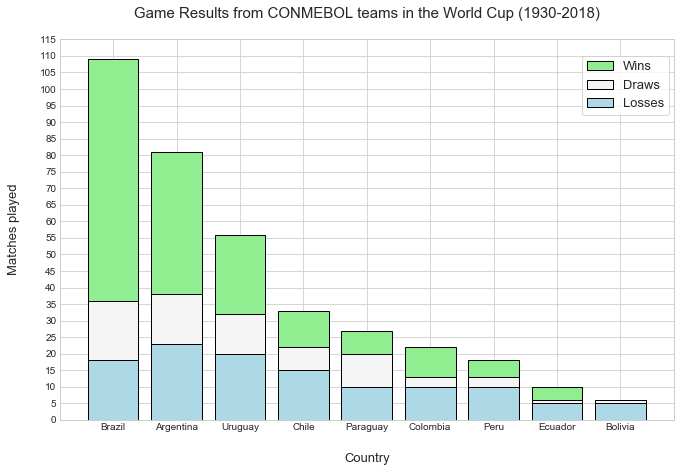

In [65]:
f, ax = plt.subplots(figsize=(11, 7))
L = plt.bar(stats[stats.Confederation=='CONMEBOL'].Team, stats[stats.Confederation=='CONMEBOL'].L, 
            color='lightblue',edgecolor='black')
D = plt.bar(stats[stats.Confederation=='CONMEBOL'].Team, stats[stats.Confederation=='CONMEBOL'].D,
        bottom=stats[stats.Confederation=='CONMEBOL'].L, color='whitesmoke', edgecolor='black')
W = plt.bar(stats[stats.Confederation=='CONMEBOL'].Team, stats[stats.Confederation=='CONMEBOL'].W, 
        bottom=(stats[stats.Confederation=='CONMEBOL'].D+stats[stats.Confederation=='CONMEBOL'].L), 
            color='lightgreen', edgecolor='black')
plt.xlabel('Country',size=13, labelpad=20)
plt.ylabel('Matches played',size=13, labelpad=20)
plt.yticks(np.arange(0,120,5))
plt.legend((W,D,L),('Wins','Draws','Losses'), frameon = True, loc = (.85,.8), prop = {'size':13})
plt.title('Game Results from CONMEBOL teams in the World Cup (1930-2018)',size=15, y=1.04)
f.savefig('18CONMEBOLMatchResults.png', dpi=300)
plt.show()

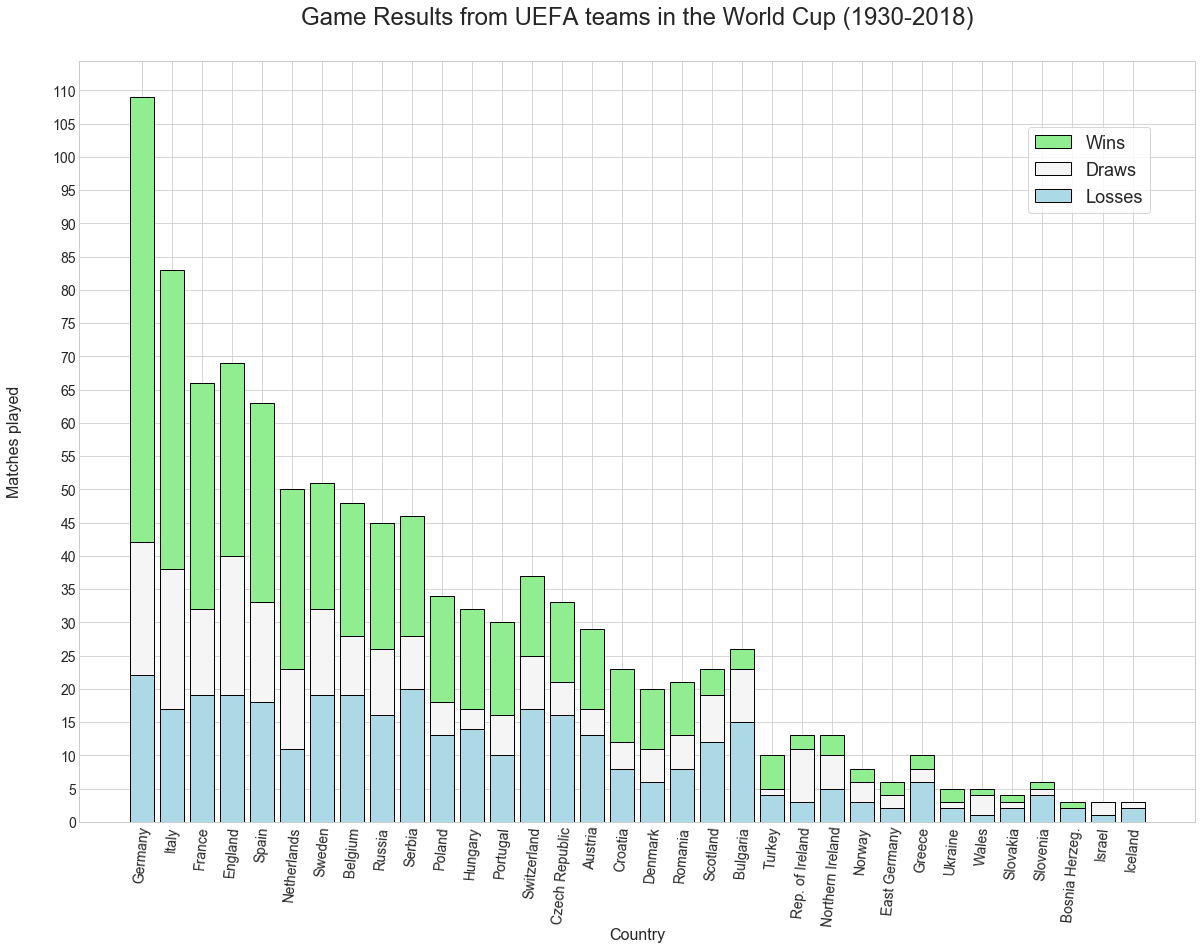

In [66]:
f, ax = plt.subplots(figsize=(20, 14))
L = plt.bar(stats[stats.Confederation=='UEFA'].Team, stats[stats.Confederation=='UEFA'].L, 
            color='lightblue',edgecolor='black')
D = plt.bar(stats[stats.Confederation=='UEFA'].Team, stats[stats.Confederation=='UEFA'].D,
        bottom=stats[stats.Confederation=='UEFA'].L, color='whitesmoke', edgecolor='black')
W = plt.bar(stats[stats.Confederation=='UEFA'].Team, stats[stats.Confederation=='UEFA'].W, 
        bottom=(stats[stats.Confederation=='UEFA'].D+stats[stats.Confederation=='UEFA'].L), 
            color='lightgreen', edgecolor='black')
plt.xlabel('Country',size=16, labelpad=0)
plt.ylabel('Matches played',size=16, labelpad=30)
plt.xticks(rotation=85, fontsize=14)
plt.yticks(np.arange(0,115,5), fontsize=14)
plt.legend((W,D,L),('Wins','Draws','Losses'), frameon = True, loc = (.85,.8), prop = {'size':18})
plt.title('Game Results from UEFA teams in the World Cup (1930-2018)',size=24, y=1.04)
f.savefig('19UEFAMatchResults.png', dpi=300)
plt.show()

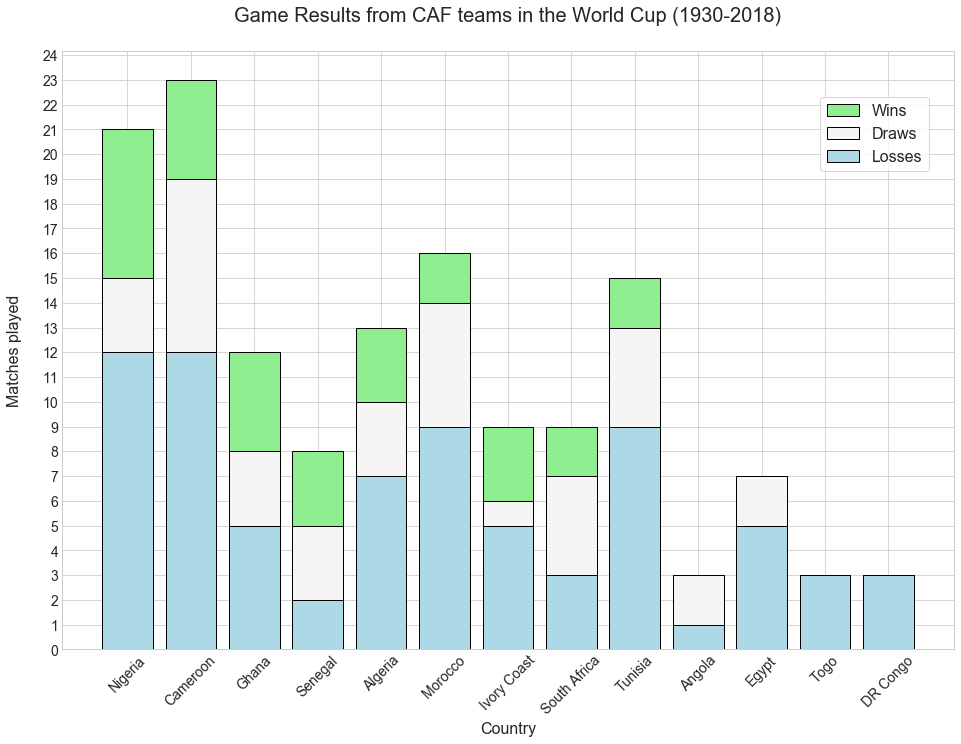

In [67]:
f, ax = plt.subplots(figsize=(16, 11))
L = plt.bar(stats[stats.Confederation=='CAF'].Team, stats[stats.Confederation=='CAF'].L, color='lightblue',
            edgecolor='black')
D = plt.bar(stats[stats.Confederation=='CAF'].Team, stats[stats.Confederation=='CAF'].D,
        bottom=stats[stats.Confederation=='CAF'].L, color='whitesmoke', edgecolor='black')
W = plt.bar(stats[stats.Confederation=='CAF'].Team, stats[stats.Confederation=='CAF'].W, 
        bottom=(stats[stats.Confederation=='CAF'].D+stats[stats.Confederation=='CAF'].L), color='lightgreen', edgecolor='black')
plt.xlabel('Country',size=16, labelpad=5)
plt.ylabel('Matches played',size=16, labelpad=20)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(np.arange(0,25,1), fontsize=14)
plt.legend((W,D,L),('Wins','Draws','Losses'), frameon = True, loc = (.85,.8), prop = {'size':16})
plt.title('Game Results from CAF teams in the World Cup (1930-2018)',size=20, y=1.04)
f.savefig('20CAFMatchResults.png', dpi=300)
plt.show()

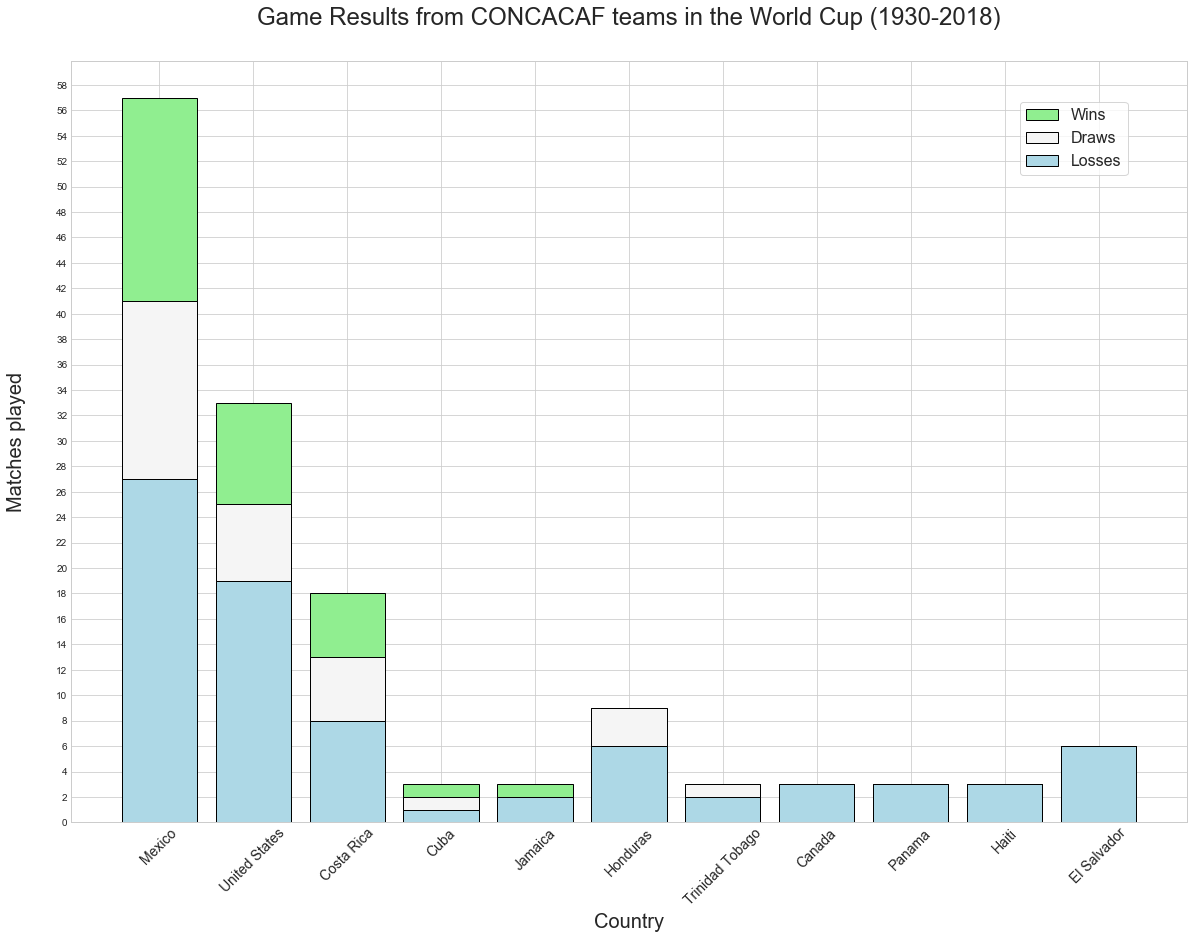

In [68]:
f, ax = plt.subplots(figsize=(20, 14))
L = plt.bar(stats[stats.Confederation=='CONCACAF'].Team, stats[stats.Confederation=='CONCACAF'].L, color='lightblue',
            edgecolor='black')
D = plt.bar(stats[stats.Confederation=='CONCACAF'].Team, stats[stats.Confederation=='CONCACAF'].D,
        bottom=stats[stats.Confederation=='CONCACAF'].L, color='whitesmoke', edgecolor='black')
W = plt.bar(stats[stats.Confederation=='CONCACAF'].Team, stats[stats.Confederation=='CONCACAF'].W, 
        bottom=(stats[stats.Confederation=='CONCACAF'].D+stats[stats.Confederation=='CONCACAF'].L), color='lightgreen', edgecolor='black')
plt.xlabel('Country',size=20, labelpad=5)
plt.ylabel('Matches played',size=20, labelpad=30)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(np.arange(0,60,2))
plt.legend((W,D,L),('Wins','Draws','Losses'), frameon = True, loc = (.85,.85), prop = {'size':16})
plt.title('Game Results from CONCACAF teams in the World Cup (1930-2018)',size=24, y=1.04)
f.savefig('21CONCACAFMatchResults.png', dpi=300)
plt.show()

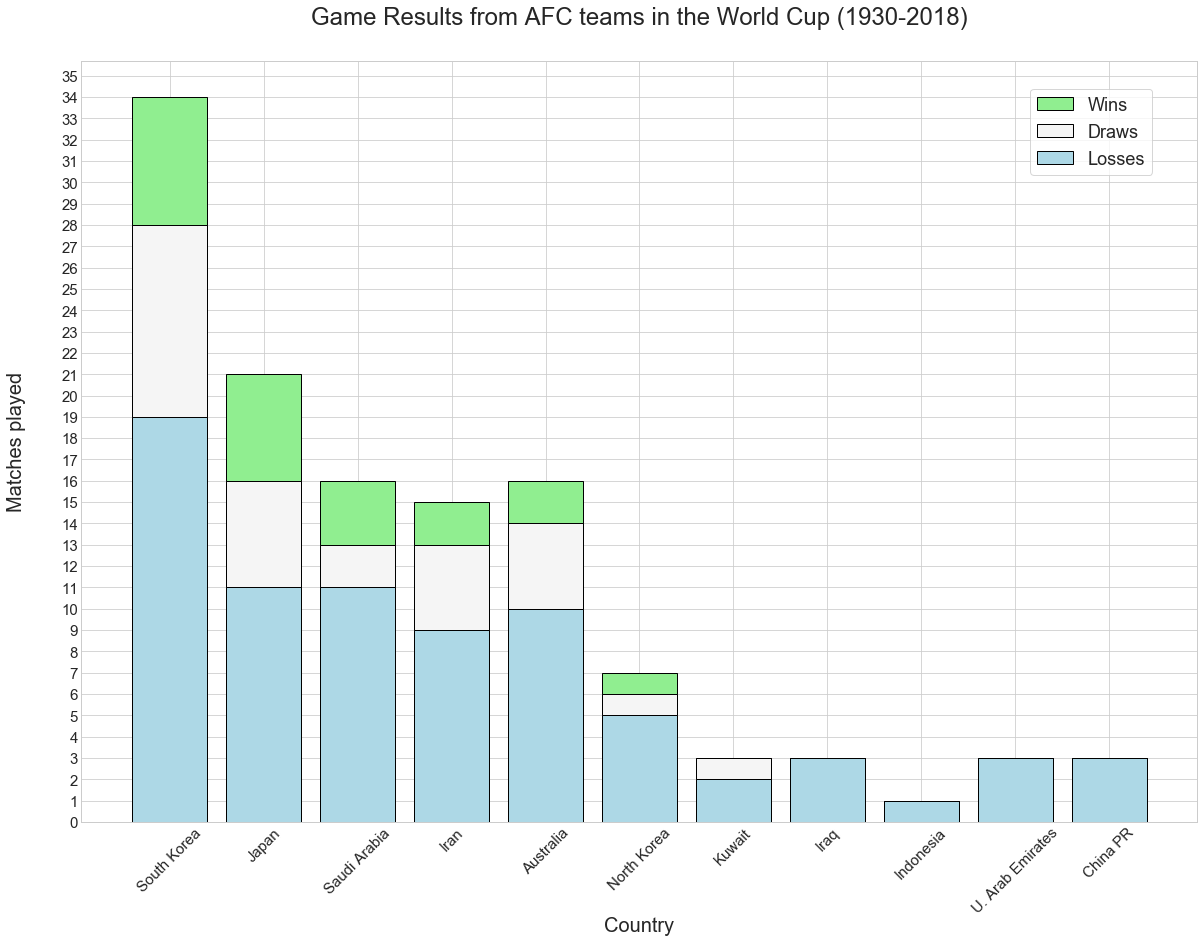

In [69]:
f, ax = plt.subplots(figsize=(20, 14))
L = plt.bar(stats[stats.Confederation=='AFC'].Team, stats[stats.Confederation=='AFC'].L, color='lightblue',edgecolor='black')
D = plt.bar(stats[stats.Confederation=='AFC'].Team, stats[stats.Confederation=='AFC'].D,
        bottom=stats[stats.Confederation=='AFC'].L, color='whitesmoke', edgecolor='black')
W = plt.bar(stats[stats.Confederation=='AFC'].Team, stats[stats.Confederation=='AFC'].W, 
        bottom=(stats[stats.Confederation=='AFC'].D+stats[stats.Confederation=='AFC'].L), color='lightgreen', edgecolor='black')
plt.xlabel('Country',size=20, labelpad=0)
plt.ylabel('Matches played',size=20, labelpad=35)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(np.arange(0,36,1),fontsize=15)
plt.title('Game Results from AFC teams in the World Cup (1930-2018)',size=24, y =1.04)
plt.legend((W,D,L),('Wins','Draws','Losses'), frameon = True, loc = (.85,.85), prop = {'size':18})
f.savefig('22AFCMatchResults.png', dpi=300)
plt.show()

---

This analysis approaches the period from 1930 to 2018. From the 2022 edition on, the FIFA World Cup will go through a notable change, expanding the number of participants from 32 teams to 48 teams. Due to that increase of 50% in the number of participants, it is reasonable to expect some of the stats will also go through big changes starting in the next World Cup. The code can still be used for future analysis; it is only necessary to update the csv file.